*Objective:* create a wordcloud
Use column names and gender, region and bmi_category data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# load the cleaned data in to a dataframe
df = pd.read_csv('../data/insurance_cleaned.csv')
df.head()

,age,gender,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [34]:
# get the column names from the data
columns_list = df.columns.tolist()
columns_list

# get the text from specific columns
text = (
    df[['gender', 'region', 'bmi_category']]
    .astype(str)
    .values
    .flatten()
)

input_text = " ".join(columns_list) + " " + " ".join(text)
input_text



'age gender bmi children smoker region charges bmi_category female southwest overweight male southeast obese male southeast obese male northwest healthy weight male northwest overweight female southeast overweight female southeast obese female northwest overweight male northeast overweight female northwest overweight male northeast overweight female southeast overweight male southwest obese female southeast obese male southeast severely obese male southwest healthy weight female northeast obese male northeast healthy weight male southwest severely obese male southwest obese female northeast obese female southwest obese male southeast obese female northeast obese male northwest overweight female southeast overweight female northeast healthy weight female northwest obese male northwest underweight male southwest obese male southwest obese female northeast overweight female southwest overweight male northwest overweight male southwest obese male northwest healthy weight female northwest o

In [62]:
# generate wordcloud
# stopwords helps to filter out common words like 'the', 'and', etc.
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Dark2",
    collocations=False,
    stopwords=STOPWORDS,
).generate(input_text)

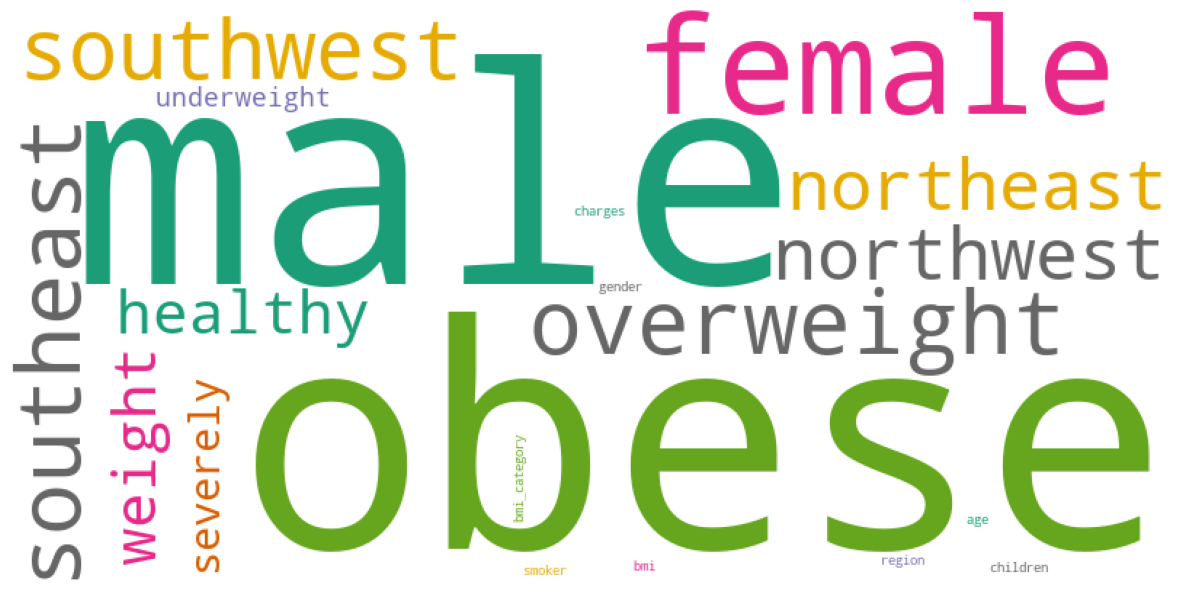

In [63]:
# display wordcloud
plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

The column names are really tiny, their frequency needs to be artificially increased as this is how a wordcloud is formed. 

In [37]:
from collections import Counter

word_freq = Counter(text)
word_freq

Counter({'male': 675,
         'female': 662,
         'obese': 624,
         'overweight': 377,
         'southeast': 364,
         'southwest': 325,
         'northwest': 324,
         'northeast': 324,
         'healthy weight': 222,
         'severely obese': 94,
         'underweight': 20})

In [ ]:
# boost column names
for col in columns_list:
    word_freq[col] += 100   # increase this number as needed

In [64]:
# generate wordcloud with updated frequencies
wordcloud.generate_from_frequencies(word_freq)

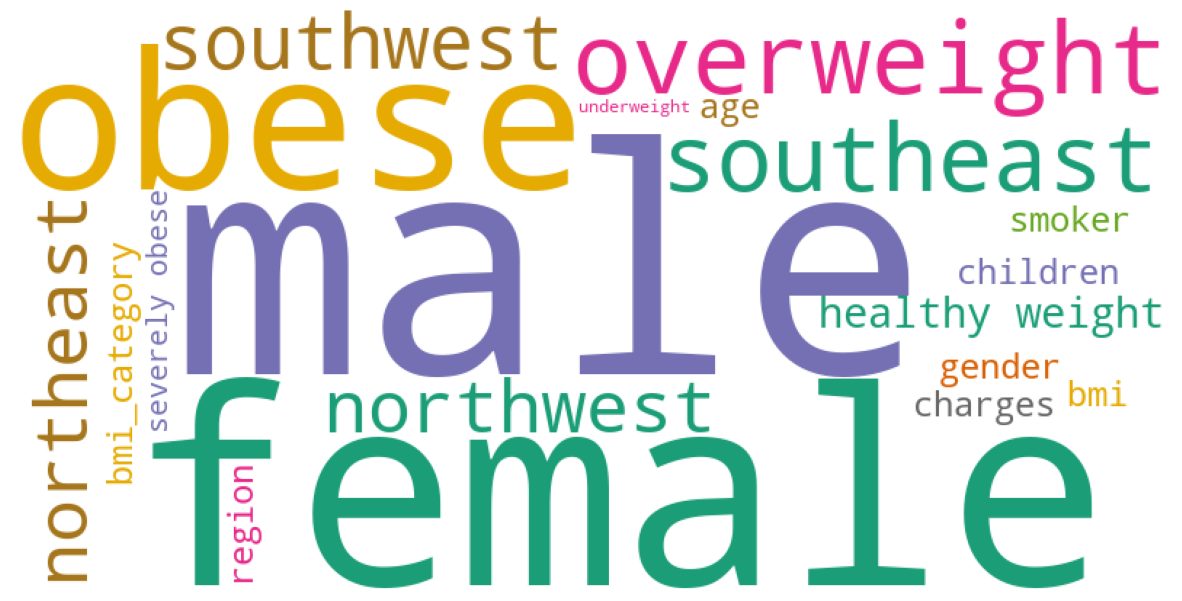

In [65]:
# display new wordcloud
plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()